#### Live Capture Setup

In [1]:
# Common Imports

#Pandas for creating dataframes
import pandas as pd

#Pyshark to capture packets
import pyshark

# Ploting
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [3]:
# Create capture object for live capture
live_capture = pyshark.LiveCapture(interface='wlan1')

#### Live Cature (Packet count)

In [130]:
d = dict()

# Capture 50 live packets
for packet in live_capture.sniff_continuously(packet_count=50):  
        try:
            #print(packet.ip.dst)
            p = packet.ip.dst
            if p in d:
                d[p] += 1
            else:
                d[p] = 1            
        except AttributeError:
            pass
            #print('Ipv4 packet does not exist')
print(d)

{'192.168.0.3': 14, '224.0.0.1': 16, '172.217.11.14': 17, '224.0.0.251': 1, '65.19.96.252': 1}


#### Live Cature (Time Frame)

In [131]:
# Capture packets for 5 second. Time frame is 5 second.
live_capture.sniff(timeout=5)
# print(capture)
# print(len(capture))

# Capture destination of the packet at the router and create dictionary of it.
dst_stream = dict()
for i in range(len(live_capture)):
    try:
        #print(capture[i].ip.dst)
        dst = live_capture[i].ip.dst # This can throw attribute error if dst not exist mostly caused by Ipv6 packets
        if dst in dst_stream:
            dst_stream[dst] += 1
        else:
            dst_stream[dst] = 1         
    except AttributeError:
            pass  #print('Ipv4 packet does not exist')

In [132]:
dst_stream

{'172.217.9.238': 7,
 '173.194.208.189': 1,
 '192.168.0.3': 13,
 '209.85.201.189': 1,
 '52.20.93.92': 1,
 '65.19.96.252': 1,
 '65.19.96.253': 2}

In [122]:
type(live_capture)
#capture[0]

pyshark.capture.live_capture.LiveCapture

### Read from capture file

In [2]:
# Reading packets from pre-captured file
file_cap = pyshark.FileCapture('captures/botnet-sample.pcap')

In [3]:
# Convert each request to a data frame

#List of dataframes
dfList = []

#file_cap.set_debug()

for i in range(1000):
#for packet in file_cap:
    layerList = []
    for layer in file_cap[i]:
        layer_dict = {key:value for key, value in layer._all_fields.items() if key != ''}
        layerList.append(pd.DataFrame(layer_dict, index=[0]))
    #print(i,' ',end="")
    dfList.append(pd.concat(layerList, axis=1))
    i += 1
#c = pd.concat(dfList)
# except (AttributeError, AssertionError) as e:
#     print("error")
#     #print('error')
#     continue  #print('Ipv4 packet does not exist')

[2017-11-10 00:45:11.333595] DEBUG: FileCapture: Creating TShark subprocess with parameters: /usr/bin/tshark -l -n -T pdml -r captures/botnet-sample.pcap
[2017-11-10 00:45:11.355850] DEBUG: FileCapture: %s subprocess created


In [29]:
# Create big table from all small dataframe which are per packet
first = True
for i in range(len(dfList)):
    if first:
        tdf = dfList[i]
        first = False
        #print(tdf.shape)
    else:
        tdf = tdf.append(dfList[i].loc[:,~dfList[i].columns.duplicated()], ignore_index=True

In [35]:
# Create big table from all small dataframe which are per packet
first = True
for d in dfList:
    if first:
        tdf = d
        first = False
        #print(tdf.shape)
    else:
        tdf = tdf.append(d.loc[:,~d.columns.duplicated()], ignore_index=True)

In [37]:
tdf.head()

,_ws.expert,_ws.expert.group,_ws.expert.message,_ws.expert.severity,arp.dst.hw_mac,arp.dst.proto_ipv4,arp.hw.size,arp.hw.type,arp.isgratuitous,arp.opcode,...,tcp.window_size_value,udp.checksum,udp.checksum_bad,udp.checksum_coverage,udp.checksum_good,udp.dstport,udp.length,udp.port,udp.srcport,udp.stream
0,NaN,NaN,NaN,NaN,00:00:00:00:00:00,147.32.84.165,6,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,00:00:00:00:00:00,147.32.84.165,6,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,00:00:00:00:00:00,147.32.84.165,6,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,00:00:00:00:00:00,147.32.84.165,6,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,00:00:00:00:00:00,147.32.84.165,6,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
t = tdf
i = 'ip.dst'
col = 'ip.dst'#t.columns[4]
print(col)
t = t[t[col].notnull()]
#t[[col,i]][t[col].notnull()]
t[['_ws.expert', 'ip.dst']][t['_ws.expert'].notnull()]

ip.dst


,_ws.expert,ip.dst
39,Expert Info (Chat/Sequence): Connection establ...,74.125.232.195
40,Expert Info (Chat/Sequence): Connection establ...,74.125.232.195
41,Expert Info (Chat/Sequence): Connection establ...,147.32.84.165
43,Expert Info (Note/Sequence): Duplicate ACK (#1),74.125.232.195
44,Expert Info (Chat/Sequence): GET /service/chec...,74.125.232.195
45,Expert Info (Note/Sequence): This frame is a (...,74.125.232.195
47,Expert Info (Chat/Sequence): HTTP/1.1 204 No C...,147.32.84.165
48,Expert Info (Warn/Sequence): Connection reset ...,74.125.232.195
49,Expert Info (Warn/Sequence): Connection reset ...,74.125.232.195
82,Expert Info (Chat/Sequence): M-SEARCH * HTTP/1...,239.255.255.250


In [44]:
#Get all non null data
# r = tdf
# for c in list(r.columns):
#     print(c,':',r[c][r[c].notnull()].count())

In [20]:
%time
dst_cap = dict()
for packet in file_cap:  
        try:
            #print(packet.ip.dst)
            dst = packet.ip.dst
            if dst in dst_cap:
                dst_cap[dst] += 1
            else:
                dst_cap[dst] = 1            
        except AttributeError:
            pass #print('Ipv4 packet does not exist')

{'192.168.0.3': 28, '172.217.6.202': 1, '173.194.68.189': 1, '209.85.144.189': 1, '65.19.96.253': 2, '172.217.12.206': 14, '65.19.96.252': 1}


In [57]:
#dst_cap

In [113]:
dst_cap[]

KeyError: 0

#### Create DataFrame

In [24]:
# Create Dataframe from Dictionary
df = pd.DataFrame.from_dict(dst_cap, orient="index")
df.columns = ['Fequency']

In [65]:
# Write newly created DataFrame to excel.
from openpyxl import load_workbook
workbook_name = 'data/Attack_Data.xlsx'
book = load_workbook(workbook_name)

# Get last sheet and create new sheet name
last_sheet = book.sheetnames[-1].split("_")
last_sheet_name = last_sheet[0]
last_sheet_no = int(last_sheet[1])
new_sheet = last_sheet_name + '_' + str(last_sheet_no + 1)

# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter(workbook_name, engine='xlsxwriter')
writer = pd.ExcelWriter(workbook_name, engine='openpyxl')

#Write DataFrame to excel preserve other sheets
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
df.to_excel(writer, sheet_name=new_sheet, columns=['Fequency'])
writer.save()

In [1]:
# import subprocess
# subprocess.run(["sudo", "airmon-ng"], stdout=subprocess.PIPE)

In [76]:
# Load data into dataframe
df = pd.read_excel(workbook_name, sheetname=1)

In [77]:
df.head()

,count
195.39.196.43,2
160.44.248.163,6
203.131.74.12,6
62.109.4.150,2
200.80.13.113,6


In [78]:
df['prob'] = df / df.sum()

In [81]:
df.sum()

count    322248.0
prob          1.0
dtype: float64

In [80]:
df.describe()

,count,prob
count,4202.000000,4202.000000
mean,76.689196,0.000238
std,1532.438185,0.004755
min,2.000000,0.000006
25%,2.000000,0.000006
50%,6.000000,0.000019
75%,12.000000,0.000037
max,83626.000000,0.259508


In [88]:
df.head()

,count,prob
195.39.196.43,2,0.000006
160.44.248.163,6,0.000019
203.131.74.12,6,0.000019
62.109.4.150,2,0.000006
200.80.13.113,6,0.000019


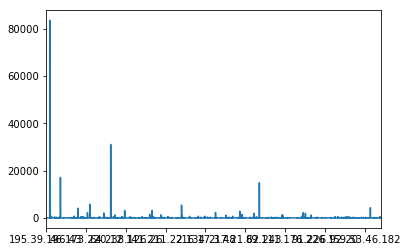

In [95]:
df['count'].plot()

In [104]:
from scipy.stats import entropy
sp.stats.entropy(df['prob'])

4.1411377421774533

In [178]:
df.sort_values('prob', ascending=False).head(10)

,count,prob
147.32.84.165,83626,0.259508
213.246.53.125,35018,0.108668
184.154.132.106,31090,0.096478
212.117.171.138,17138,0.053183
147.32.80.9,14870,0.046145
209.85.225.27,5790,0.017968
212.117.174.7,5412,0.016795
174.133.57.141,4292,0.013319
173.192.170.88,4108,0.012748
65.55.196.251,3132,0.009719


In [3]:
df1 = pd.read_csv('captures/botnet-capture-20110810-neris.csv')

In [4]:
df1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
1,2,8.982709,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
2,3,50.099564,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
3,4,50.369266,54:52:00:00:00:01,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.85
4,5,51.369054,54:52:00:00:00:01,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.85


In [162]:
df1.Protocol.unique()

array(['ARP', 'NBNS', 'DNS', 'TCP', 'HTTP', 'BROWSER', 'IGMPv3', 'SSDP',
       'NBSS', 'SMB', 'LANMAN', 'SSL', 'IRC', 'HTTP/XML', 'PKTC', 'SMTP',
       'ICMP', 'IMF', 'DCERPC', 'PKIX-CRL', 'SSLv2', 'TLSv1', 'SIP', 'UDP',
       'SNMP', 'Socks', 'Laplink'], dtype=object)

In [171]:
df2 = df1.groupby(['Destination', 'Protocol'], sort=False).sum()

In [180]:
df2.sort_values('No.', ascending=False)

,,No.,Time,Length
Destination,Protocol,,,
147.32.84.165,TCP,8173904233,4.642555e+08,16472039
213.246.53.125,TCP,5923912441,3.337465e+08,2101100
147.32.84.165,DNS,4840051074,2.687793e+08,4824102
184.154.132.106,TCP,4656572068,2.621796e+08,1865412
147.32.80.9,DNS,2740786562,1.516295e+08,1087372
212.117.171.138,TCP,2581017089,1.485063e+08,11451816
209.85.225.27,TCP,930504652,5.249934e+07,358980
212.117.174.7,TCP,875683812,4.951136e+07,335544
173.192.170.88,TCP,583379675,3.282192e+07,203988
